In [95]:
import numpy as np
import pandas as pd
import math

In [96]:
%ls

Training Logistic Regression via Stochastic Gradient Ascent.ipynb
_35bdebdff61378878ea2247780005e52_module-10-online-learning-assignment-blank.ipynb.zip
amazon_baby_subset.csv*
important_words.json
module-10-assignment-train-idx.json
module-10-assignment-validation-idx.json
module-10-online-learning-assignment-blank.ipynb*


In [97]:
products = pd.read_csv('amazon_baby_subset.csv')

In [98]:
products.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [99]:
important_words = pd.read_json('important_words.json')[0].values.tolist()

In [100]:
important_words

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monitor',
 'tried',
 'thought',
 'never',
 'item',
 'hard',
 'plasti

In [101]:
import string

punc_map = {}
for c in string.punctuation:
    punc_map[c] = ''
punc_trans = str.maketrans(punc_map)
print (punc_trans)

def remove_punctuation(text):
    return str.translate(text, punc_trans)
    
    

{33: '', 34: '', 35: '', 36: '', 37: '', 38: '', 39: '', 40: '', 41: '', 42: '', 43: '', 44: '', 45: '', 46: '', 47: '', 58: '', 59: '', 60: '', 61: '', 62: '', 63: '', 64: '', 91: '', 92: '', 93: '', 94: '', 95: '', 96: '', 123: '', 124: '', 125: '', 126: ''}


In [102]:
products.fillna('', inplace=True)

In [103]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [104]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s: s.split().count(word))

In [105]:
products.columns

Index(['name', 'review', 'rating', 'sentiment', 'review_clean', 'baby', 'one',
       'great', 'love', 'use',
       ...
       'seems', 'picture', 'completely', 'wish', 'buying', 'babies', 'won',
       'tub', 'almost', 'either'],
      dtype='object', length=198)

## Splitting data into training and validation set

In [106]:
train_idx = pd.read_json('module-10-assignment-train-idx.json')[0]
validation_idx = pd.read_json('module-10-assignment-validation-idx.json')[0]


In [107]:
train_data = products.iloc[train_idx]
validation_data = products.iloc[validation_idx]

In [108]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    features_matrix = features_frame.values
    label_sarray = dataframe[label]
    label_array = label_sarray.values

    return (features_matrix, label_array)

In [109]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data,
                                                       important_words,
                                                       'sentiment'
                                                      )
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data,
                                                       important_words,
                                                       'sentiment'
                                                      )

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Quiz question: In Module 3 assignment, there were 194 features (an intercept + one feature for each of the 193 important words). In this assignment, we will use stochastic gradient ascent to train the classifier using logistic regression. How does the changing the solver to stochastic gradient ascent affect the number of features?



Nothing changes

## Building on logistic regression

In [110]:
def predict_probability(feature_matrix, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    predictions = 1.0 / (1 + np.exp(-scores))
    return predictions

### Derivative of log likelihood with respect to a single coefficient

In [111]:
def feature_derivative(errors, feature):
    derivative = np.dot(errors, feature)
    return derivative

In [112]:
def compute_avg_log_likelihood(feature_matrix, sentiment, coefficients):

    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))
    
    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]   
    
    lp = np.sum((indicator-1)*scores - logexp)/len(feature_matrix)   
    
    return lp

In [138]:
j = 1                        # Feature number
i = 10                       # Data point number
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+1,:], coefficients)
print (predictions)
indicator = (sentiment_train[i:i+1]==+1)

errors = indicator - predictions
gradient_single_data_point = feature_derivative(errors, feature_matrix_train[i:i+1,j])
print ("Gradient single data point: %s" % gradient_single_data_point)
print ("           --> Should print 0.0")

[0.5]
Gradient single data point: 0.0
           --> Should print 0.0


### Quiz Question: The code block above computed the derivative

The code block above computed the derivative ∂ℓi(w)/∂wj for j = 1 and i = 10. Is ∂ℓi(w)/∂wj a scalar or a 194-dimensional vector?

scalar

### Modifying the derivative for using a batch of data points

In [114]:
j = 1                        # Feature number
i = 10                       # Data point start
B = 10                       # Mini-batch size
coefficients = np.zeros(194) # A point w at which we are computing the gradient.

predictions = predict_probability(feature_matrix_train[i:i+B,:], coefficients)
indicator = (sentiment_train[i:i+B]==+1)

errors = indicator - predictions
gradient_mini_batch = feature_derivative(errors, feature_matrix_train[i:i+B,j])
print ("Gradient mini-batch data points: %s" % gradient_mini_batch)
print ("                --> Should print 1.0")

Gradient mini-batch data points: 1.0
                --> Should print 1.0


### Quiz Question: The code block above computed ∑s=ii+B∂ℓs(w)∂wj for j = 10, i = 10, and B = 10. Is this a scalar or a 194-dimensional vector?

scalar

### Quiz Question: For what value of B is the term ∑s=1B∂ℓs(w)∂wj the same as the full gradient ∂ℓ(w)∂wj?



B = N

### Averaging the gradient across a batch


## Implementing stochastic gradient ascent


In [145]:
def logistic_regression_SG(feature_matrix, sentiment, initial_coefficients,
                           step_size, batch_size, max_iter):
    log_likelihood_all = []

    # make sure it's a numpy array
    coefficients = np.array(initial_coefficients)
    # set seed=1 to produce consistent results
    np.random.seed(seed=1)
    # Shuffle the data before starting
    permutation = np.random.permutation(len(feature_matrix))
    feature_matrix = feature_matrix[permutation,:]
    sentiment = sentiment[permutation]

    i = 0 # index of current batch
    # Do a linear scan over data
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        # Make sure to slice the i-th row of feature_matrix with [i:i+batch_size,:]
        ### YOUR CODE HERE
        predictions = predict_probability(feature_matrix[i:i+batch_size,:],
                                          coefficients)

        # Compute indicator value for (y_i = +1)
        # Make sure to slice the i-th entry with [i:i+batch_size]
        ### YOUR CODE HERE
        indicator = sentiment[i:i+batch_size] == +1

        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j]
            # Compute the derivative for coefficients[j] and save it to derivative.
            # Make sure to slice the i-th row of feature_matrix with [i:i+batch_size,j]
            ### YOUR CODE HERE
            derivative = feature_derivative(errors, feature_matrix[i:i+batch_size, j])
                  # Compute the product of the step size, the derivative, and
            # the **normalization constant** (1./batch_size)
            ### YOUR CODE HERE
            coefficients[j] += step_size * derivative * 1./batch_size

        # Checking whether log likelihood is increasing
        # Print the log likelihood over the *current batch*
        lp = compute_avg_log_likelihood(feature_matrix[i:i+batch_size,:],
                                        sentiment[i:i+batch_size],
                                        coefficients)
        log_likelihood_all.append(lp)
        if itr <= 15 or (itr <= 1000 and itr % 100 == 0) or (itr <= 10000 and itr % 1000 == 0) \
         or itr % 10000 == 0 or itr == max_iter-1:
            data_size = len(feature_matrix)
            print ('Iteration %*d: Average log likelihood (of data points  [%0*d:%0*d]) = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, \
                 int(np.ceil(np.log10(data_size))), i, \
                 int(np.ceil(np.log10(data_size))), i+batch_size, lp))
            # print ('Coeff: ', coefficients)

        # if we made a complete pass over data, shuffle and restart
        i += batch_size
        if i+batch_size > len(feature_matrix):
            permutation = np.random.permutation(len(feature_matrix))
            feature_matrix = feature_matrix[permutation,:]
            sentiment = sentiment[permutation]
            i = 0                

    # We return the list of log likelihoods for plotting purposes.
    return coefficients, log_likelihood_all

## Checkpoint

In [146]:
sample_feature_matrix = np.array([[1.,2.,-1.], [1.,0.,1.]])
sample_sentiment = np.array([+1, -1])

coefficients, log_likelihood = logistic_regression_SG(sample_feature_matrix,
                                                      sample_sentiment, np.zeros(3),
                                                      step_size=1., batch_size=2, max_iter=2)

print ('-------------------------------------------------------------------------------------')
print ('Coefficients learned                 :', coefficients)
print ('Average log likelihood per-iteration :', log_likelihood)

if np.allclose(coefficients, np.array([-0.09755757,  0.68242552, -0.7799831]), atol=1e-3)\
  and np.allclose(log_likelihood, np.array([-0.33774513108142956, -0.2345530939410341])):
    # pass if elements match within 1e-3
    print ('-------------------------------------------------------------------------------------')
    print ('Test passed!')
else:
    print ('-------------------------------------------------------------------------------------')
    print ('Test failed')

Iteration 0: Average log likelihood (of data points  [0:2]) = -0.33774513
Iteration 1: Average log likelihood (of data points  [0:2]) = -0.23455309
-------------------------------------------------------------------------------------
Coefficients learned                 : [-0.09755757  0.68242552 -0.7799831 ]
Average log likelihood per-iteration : [-0.33774513108142956, -0.2345530939410341]
-------------------------------------------------------------------------------------
Test passed!


## Compare convergence behavior of stochastic gradient ascent


## Quiz Question: For what value of batch size B above is the stochastic gradient ascent function logistic_regression_SG act as a standard gradient ascent algorithm?



B = N

## Running gradient ascent using the stochastic gradient ascent implementation


In [147]:
initial_coefficients = np.zeros(194)
step_size = 5e-1
batch_size = 1
max_iter = 10

In [148]:
coefficients, log_likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                          sentiment_train,
                                                          initial_coefficients,
                                                          step_size,
                                                          batch_size,
                                                          max_iter
                                                         )

Iteration 0: Average log likelihood (of data points  [00000:00001]) = -0.25192908
Iteration 1: Average log likelihood (of data points  [00001:00002]) = -0.00000001
Iteration 2: Average log likelihood (of data points  [00002:00003]) = -0.12692771
Iteration 3: Average log likelihood (of data points  [00003:00004]) = -0.02969101
Iteration 4: Average log likelihood (of data points  [00004:00005]) = -0.02668819
Iteration 5: Average log likelihood (of data points  [00005:00006]) = -0.04332901
Iteration 6: Average log likelihood (of data points  [00006:00007]) = -0.02368802
Iteration 7: Average log likelihood (of data points  [00007:00008]) = -0.12686897
Iteration 8: Average log likelihood (of data points  [00008:00009]) = -0.04468879
Iteration 9: Average log likelihood (of data points  [00009:00010]) = -0.00000124


### Quiz Question. When you set batch_size = 1, as each iteration passes, how does the average log likelihood in the batch change?



In [149]:
initial_coefficients = np.zeros(194)
step_size = 5e-1
batch_size = feature_matrix_train.shape[0]
max_iter = 200

In [150]:
coefficients, log_likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                          sentiment_train,
                                                          initial_coefficients,
                                                          step_size,
                                                          batch_size,
                                                          max_iter
                                                         )

Iteration   0: Average log likelihood (of data points  [00000:47780]) = -0.68308119
Iteration   1: Average log likelihood (of data points  [00000:47780]) = -0.67394599
Iteration   2: Average log likelihood (of data points  [00000:47780]) = -0.66555129
Iteration   3: Average log likelihood (of data points  [00000:47780]) = -0.65779626
Iteration   4: Average log likelihood (of data points  [00000:47780]) = -0.65060701
Iteration   5: Average log likelihood (of data points  [00000:47780]) = -0.64392241
Iteration   6: Average log likelihood (of data points  [00000:47780]) = -0.63769009
Iteration   7: Average log likelihood (of data points  [00000:47780]) = -0.63186462
Iteration   8: Average log likelihood (of data points  [00000:47780]) = -0.62640636
Iteration   9: Average log likelihood (of data points  [00000:47780]) = -0.62128063
Iteration  10: Average log likelihood (of data points  [00000:47780]) = -0.61645691
Iteration  11: Average log likelihood (of data points  [00000:47780]) = -0.6

### Quiz Question. When you set batch_size = len(train_data), as each iteration passes, how does the average log likelihood in the batch change?



moving around center value

## Make "passes" over the dataset


## Quiz Question Suppose that we run stochastic gradient ascent with a batch size of 100. How many gradient updates are performed at the end of two passes over a dataset consisting of 50000 data points?

In [120]:
2 * 50000 / 100

1000.0

## Log likelihood plots for stochastic gradient ascent


In [121]:
log_likelihood_all = []


In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_plot(log_likelihood_all, len_data, batch_size, smoothing_window=1, label=''):
    plt.rcParams.update({'figure.figsize': (9,5)})
    log_likelihood_all_ma = np.convolve(np.array(log_likelihood_all), \
                                        np.ones((smoothing_window,))/smoothing_window, mode='valid')

    plt.plot(np.array(range(smoothing_window-1, len(log_likelihood_all)))*float(batch_size)/len_data,
             log_likelihood_all_ma, linewidth=4.0, label=label)
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
    plt.xlabel('# of passes over data')
    plt.ylabel('Average log likelihood per data point')
    plt.legend(loc='lower right', prop={'size':14})


### let us run stochastic gradient ascent for 10 passess.

In [123]:
initial_coefficients = np.zeros(194)
step_size = 1e-1
batch_size = 100
max_iter = int(len(train_data) * 200 / batch_size)

In [124]:
max_iter

95560

In [151]:
coefficients, log_likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                          sentiment_train,
                                                          initial_coefficients,
                                                          step_size,
                                                          batch_size,
                                                          max_iter
                                                         )

Iteration   0: Average log likelihood (of data points  [00000:47780]) = -0.68308119
Iteration   1: Average log likelihood (of data points  [00000:47780]) = -0.67394599
Iteration   2: Average log likelihood (of data points  [00000:47780]) = -0.66555129
Iteration   3: Average log likelihood (of data points  [00000:47780]) = -0.65779626
Iteration   4: Average log likelihood (of data points  [00000:47780]) = -0.65060701
Iteration   5: Average log likelihood (of data points  [00000:47780]) = -0.64392241
Iteration   6: Average log likelihood (of data points  [00000:47780]) = -0.63769009
Iteration   7: Average log likelihood (of data points  [00000:47780]) = -0.63186462
Iteration   8: Average log likelihood (of data points  [00000:47780]) = -0.62640636
Iteration   9: Average log likelihood (of data points  [00000:47780]) = -0.62128063
Iteration  10: Average log likelihood (of data points  [00000:47780]) = -0.61645691
Iteration  11: Average log likelihood (of data points  [00000:47780]) = -0.6

No handles with labels found to put in legend.


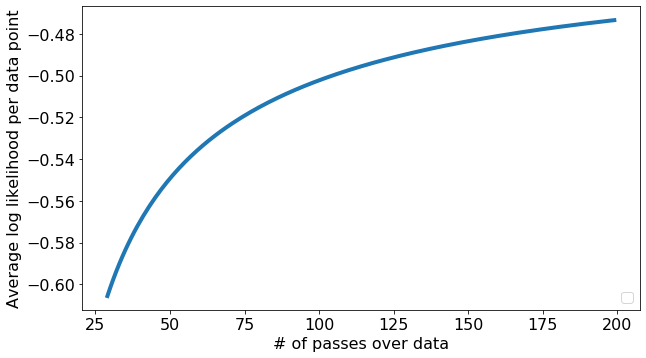

In [152]:
make_plot(log_likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

No handles with labels found to put in legend.


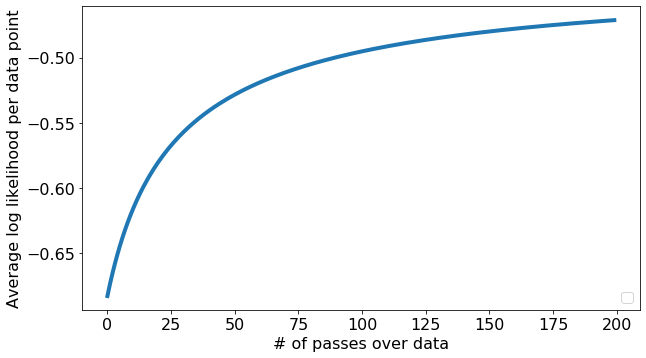

In [153]:
make_plot(log_likelihood_all, len(train_data), batch_size, smoothing_window=1, label='')

In [164]:
batch_size=100

In [172]:
sto_coef, sto_likelihood = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  np.zeros(194),
                                                  0.1,
                                                  batch_size,
                                                  max_iter=int(200 * len(train_data) / batch_size)
                                                 )

Iteration     0: Average log likelihood (of data points  [00000:00100]) = -0.68251093
Iteration     1: Average log likelihood (of data points  [00100:00200]) = -0.67845294
Iteration     2: Average log likelihood (of data points  [00200:00300]) = -0.68207160
Iteration     3: Average log likelihood (of data points  [00300:00400]) = -0.67411325
Iteration     4: Average log likelihood (of data points  [00400:00500]) = -0.67804438
Iteration     5: Average log likelihood (of data points  [00500:00600]) = -0.67712546
Iteration     6: Average log likelihood (of data points  [00600:00700]) = -0.66377074
Iteration     7: Average log likelihood (of data points  [00700:00800]) = -0.67321231
Iteration     8: Average log likelihood (of data points  [00800:00900]) = -0.66923613
Iteration     9: Average log likelihood (of data points  [00900:01000]) = -0.67479446
Iteration    10: Average log likelihood (of data points  [01000:01100]) = -0.66501639
Iteration    11: Average log likelihood (of data point

No handles with labels found to put in legend.


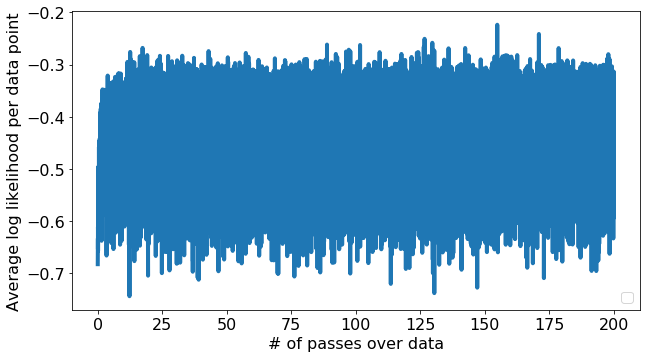

In [182]:
make_plot(sto_likelihood, len(train_data), batch_size, smoothing_window=1, label='')

No handles with labels found to put in legend.


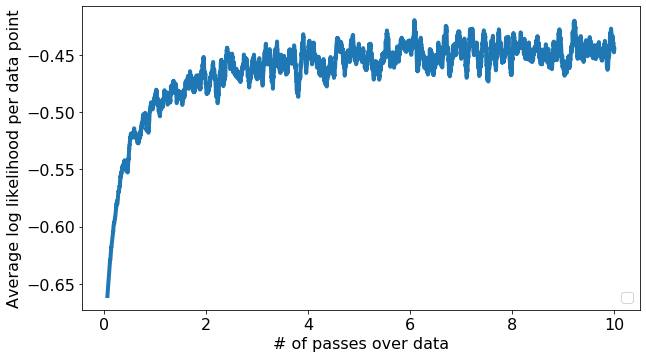

In [223]:
make_plot(sto_likelihood[0:int(10*len(train_data)/100)], len(train_data), 100, smoothing_window=30, label='')

No handles with labels found to put in legend.


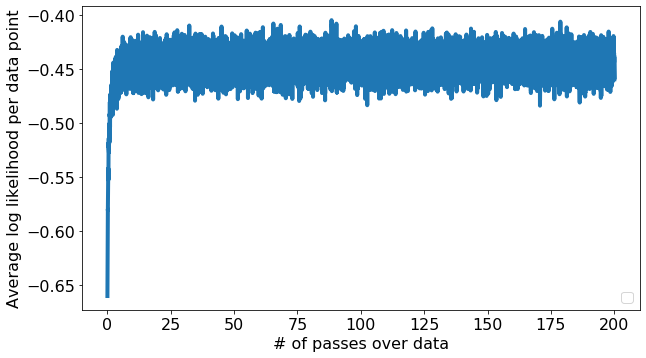

In [228]:
make_plot(sto_likelihood, len(train_data), 100, smoothing_window=30, label='')

In [ ]:
batch_size = len(train_data)
max_iter=200

In [179]:
batch_coef, batch_likelihood = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  np.zeros(194),
                                                  0.5,
                                                  batch_size,
                                                  max_iter=200
                                                 )

Iteration   0: Average log likelihood (of data points  [00000:00100]) = -0.64617233
Iteration   1: Average log likelihood (of data points  [00100:00200]) = -0.63180219
Iteration   2: Average log likelihood (of data points  [00200:00300]) = -0.64099601
Iteration   3: Average log likelihood (of data points  [00300:00400]) = -0.62741219
Iteration   4: Average log likelihood (of data points  [00400:00500]) = -0.62195670
Iteration   5: Average log likelihood (of data points  [00500:00600]) = -0.62225031
Iteration   6: Average log likelihood (of data points  [00600:00700]) = -0.59220215
Iteration   7: Average log likelihood (of data points  [00700:00800]) = -0.60809643
Iteration   8: Average log likelihood (of data points  [00800:00900]) = -0.60239203
Iteration   9: Average log likelihood (of data points  [00900:01000]) = -0.62004824
Iteration  10: Average log likelihood (of data points  [01000:01100]) = -0.59940985
Iteration  11: Average log likelihood (of data points  [01100:01200]) = -0.5

In [181]:
batch_likelihood

[-0.6461723263553053,
 -0.6318021870562228,
 -0.6409960087895391,
 -0.6274121856192777,
 -0.6219566997978518,
 -0.622250305000384,
 -0.5922021549143469,
 -0.6080964253576239,
 -0.6023920270239662,
 -0.6200482444968981,
 -0.5994098521991774,
 -0.5621765858431234,
 -0.5941103643517746,
 -0.5896576088996085,
 -0.5763483152094593,
 -0.5525017434949306,
 -0.6037826893415462,
 -0.5490034809511921,
 -0.5771764038781918,
 -0.589066653524753,
 -0.5389265809539268,
 -0.5644589616115954,
 -0.5657818810476803,
 -0.6022334827199682,
 -0.5217483993428275,
 -0.5502063040911491,
 -0.5470837025628559,
 -0.5663075024478974,
 -0.5607021963613464,
 -0.5216664289444862,
 -0.5557210209819576,
 -0.530254078496275,
 -0.5513170182802106,
 -0.5496689533259087,
 -0.5201161675148451,
 -0.512040631608458,
 -0.49261704440588816,
 -0.5791271165410437,
 -0.49138785877765656,
 -0.5774948155415678,
 -0.536646573215319,
 -0.5131650935658276,
 -0.5239021346536579,
 -0.5152344194315386,
 -0.4977783469262519,
 -0.522237261

No handles with labels found to put in legend.


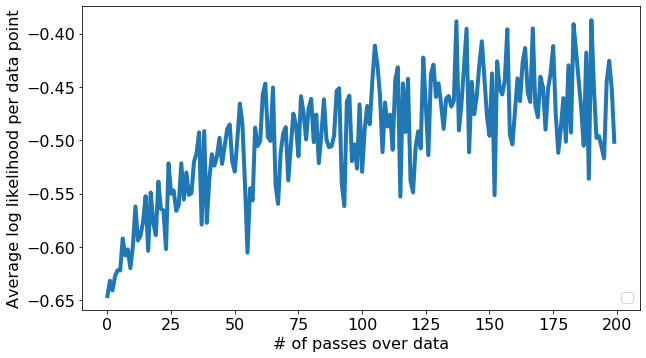

In [184]:
make_plot(batch_likelihood, len(train_data), len(train_data), smoothing_window=1, label='')

No handles with labels found to put in legend.


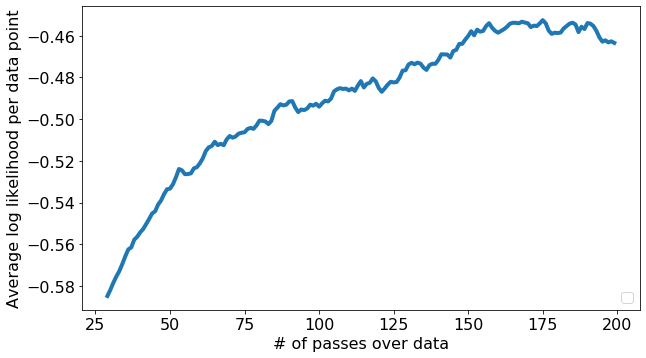

In [185]:
make_plot(batch_likelihood, len(train_data), len(train_data), smoothing_window=30, label='')

### Quiz Question: In the figure above, how many passes does batch gradient ascent need to achieve a similar log likelihood as stochastic gradient ascent?



In [189]:
sum(batch_likelihood[-20:])/20

-0.4642101463387296

## Explorer the effects of step sizes on stochastic gradient ascent

In [195]:
initial_coefficients=np.zeros(194)
batch_size=100
max_iter=int(10*len(train_data)/batch_size)

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.69313622
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.69313170
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.69313585
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.69312487
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.69313157
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.69313113
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.69311121
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.69312692
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.69312115
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.69312811
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.69311286
Iteration   11: Average log likelihood (of data points  [01100:01

No handles with labels found to put in legend.


Iteration 4777: Average log likelihood (of data points  [00700:00800]) = -0.68334170
Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.69303759
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.69299241
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.69303389
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.69292442
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.69299113
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.69298668
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.69278828
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.69294460
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.69288708
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.69295651
Iteration   10: Average log likelihood (of data points  [01000:01

No handles with labels found to put in legend.


Iteration 4777: Average log likelihood (of data points  [00700:00800]) = -0.62380603
Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.69205420
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.69160695
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.69201686
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.69095428
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.69159348
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.69154386
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.68964000
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.69112685
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.69056997
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.69124730
Iteration   10: Average log likelihood (of data points  [01000:01

No handles with labels found to put in legend.


Iteration 4777: Average log likelihood (of data points  [00700:00800]) = -0.49267051
Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.61201447
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.58843678
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.59771677
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.58770466
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.56939710
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.57554451
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.54068090
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.55212916
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.55311029
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.57672007
Iteration   10: Average log likelihood (of data points  [01000:01

No handles with labels found to put in legend.


Iteration 4777: Average log likelihood (of data points  [00700:00800]) = -0.38626337
Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.51319004
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -2.20035379
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -3.34199720
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -3.06285156
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -2.80822162
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -2.99629286
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -2.71489944
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -3.61713200
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -1.19526584
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.75357081
Iteration   10: Average log likelihood (of data points  [01000:01

No handles with labels found to put in legend.


Iteration 4777: Average log likelihood (of data points  [00700:00800]) = -0.48217136


/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Iteration    0: Average log likelihood (of data points  [00000:00100]) = -2.44471310
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -36.66862050
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -25.49870239
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -40.14565040
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -27.03748522
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -32.62294582
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -25.88017915
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -37.30720216
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -10.87360529
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -6.60878996
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -7.15375088
Iteration   11: Average log likelihood (of data points  [

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Iteration  300: Average log likelihood (of data points  [30000:30100]) = -9.16598260
Iteration  400: Average log likelihood (of data points  [40000:40100]) = -6.53500674
Iteration  500: Average log likelihood (of data points  [02300:02400]) = -5.74111518
Iteration  600: Average log likelihood (of data points  [12300:12400]) = -12.39788107
Iteration  700: Average log likelihood (of data points  [22300:22400]) = -8.73851801
Iteration  800: Average log likelihood (of data points  [32300:32400]) = -9.20873511
Iteration  900: Average log likelihood (of data points  [42300:42400]) = -4.19929473
Iteration 1000: Average log likelihood (of data points  [04600:04700]) = -3.42817101
Iteration 2000: Average log likelihood (of data points  [09200:09300]) = -17.67154169
Iteration 3000: Average log likelihood (of data points  [13800:13900]) = -2.10596986
Iteration 4000: Average log likelihood (of data points  [18400:18500]) = -28.68013706


No handles with labels found to put in legend.


Iteration 4777: Average log likelihood (of data points  [00700:00800]) = -4.52783399


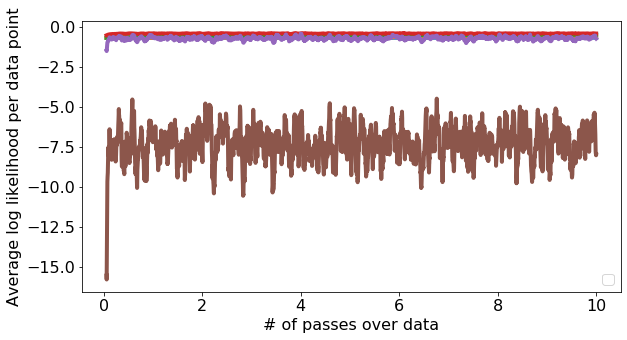

In [196]:
for step_size in [1e-4, 1e-3, 1e-2, 1e0, 1e1, 1e2]:
    coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  step_size,
                                                  batch_size,
                                                  max_iter
                                                 )
    make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')
    

In [199]:
coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  1e-4,
                                                  batch_size,
                                                  max_iter
                                                 )

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.69313622
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.69313170
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.69313585
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.69312487
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.69313157
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.69313113
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.69311121
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.69312692
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.69312115
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.69312811
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.69311286
Iteration   11: Average log likelihood (of data points  [01100:01

No handles with labels found to put in legend.


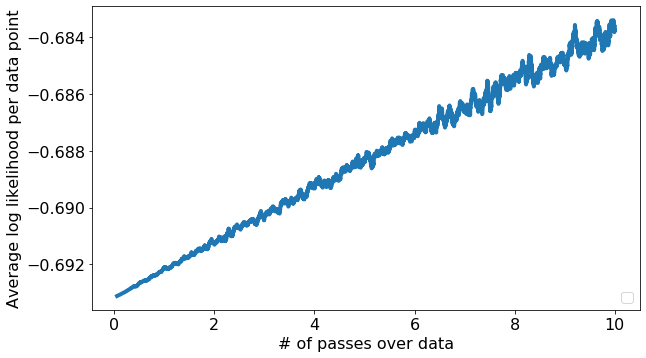

In [200]:
make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

### 1e-3

In [201]:
step_size = 1e-3

In [202]:
coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  step_size,
                                                  batch_size,
                                                  max_iter
                                                 )

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.69303759
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.69299241
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.69303389
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.69292442
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.69299113
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.69298668
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.69278828
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.69294460
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.69288708
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.69295651
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.69280480
Iteration   11: Average log likelihood (of data points  [01100:01

No handles with labels found to put in legend.


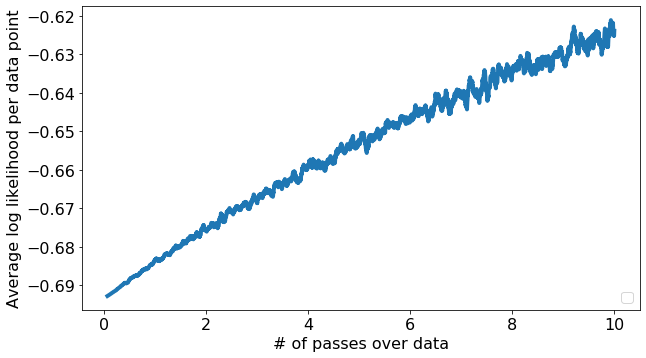

In [203]:
make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

### 1e-2

In [204]:
step_size=1e-2

In [205]:
coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  step_size,
                                                  batch_size,
                                                  max_iter
                                                 )

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.69205420
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.69160695
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.69201686
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.69095428
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.69159348
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.69154386
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.68964000
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.69112685
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.69056997
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.69124730
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.68980179
Iteration   11: Average log likelihood (of data points  [01100:01

No handles with labels found to put in legend.


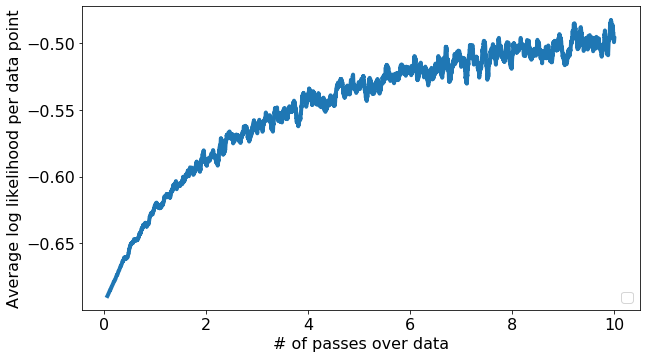

In [206]:
make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

## 1e-1

In [207]:
step_size=1e-1

In [208]:
coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  step_size,
                                                  batch_size,
                                                  max_iter
                                                 )

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.68251093
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.67845294
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.68207160
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.67411325
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.67804438
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.67712546
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.66377074
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.67321231
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.66923613
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.67479446
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.66501639
Iteration   11: Average log likelihood (of data points  [01100:01

No handles with labels found to put in legend.


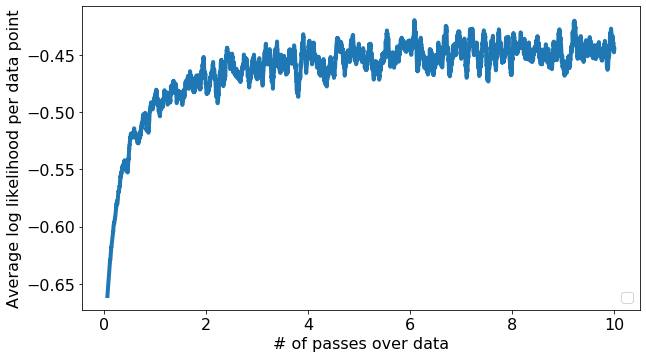

In [209]:
make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

## 1e0

In [210]:
step_size=1e0

In [211]:
coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  step_size,
                                                  batch_size,
                                                  max_iter
                                                 )

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.61201447
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -0.58843678
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -0.59771677
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -0.58770466
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -0.56939710
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -0.57554451
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -0.54068090
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -0.55212916
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -0.55311029
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.57672007
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.55455807
Iteration   11: Average log likelihood (of data points  [01100:01

No handles with labels found to put in legend.


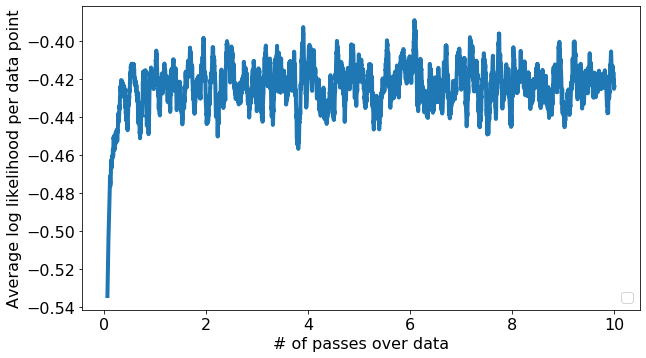

In [212]:
make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

## 1e1

In [213]:
step_size=1e1

In [215]:
coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  step_size,
                                                  batch_size,
                                                  max_iter
                                                 )

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -0.51319004
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -2.20035379
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -3.34199720
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -3.06285156
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -2.80822162
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -2.99629286
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -2.71489944
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -3.61713200
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -1.19526584
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -0.75357081
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -0.71310829
Iteration   11: Average log likelihood (of data points  [01100:01

No handles with labels found to put in legend.


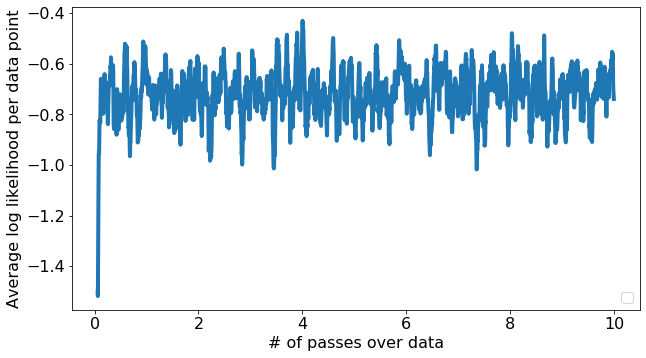

In [216]:
make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

## 1e2

In [217]:
step_size=1e2

In [218]:
coef, likelihood_all = logistic_regression_SG(feature_matrix_train,
                                                  sentiment_train,
                                                  initial_coefficients,
                                                  step_size,
                                                  batch_size,
                                                  max_iter
                                                 )

Iteration    0: Average log likelihood (of data points  [00000:00100]) = -2.44471310
Iteration    1: Average log likelihood (of data points  [00100:00200]) = -36.66862050
Iteration    2: Average log likelihood (of data points  [00200:00300]) = -25.49870239
Iteration    3: Average log likelihood (of data points  [00300:00400]) = -40.14565040
Iteration    4: Average log likelihood (of data points  [00400:00500]) = -27.03748522
Iteration    5: Average log likelihood (of data points  [00500:00600]) = -32.62294582
Iteration    6: Average log likelihood (of data points  [00600:00700]) = -25.88017915
Iteration    7: Average log likelihood (of data points  [00700:00800]) = -37.30720216
Iteration    8: Average log likelihood (of data points  [00800:00900]) = -10.87360529
Iteration    9: Average log likelihood (of data points  [00900:01000]) = -6.60878996
Iteration   10: Average log likelihood (of data points  [01000:01100]) = -7.15375088
Iteration   11: Average log likelihood (of data points  [

/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Iteration  200: Average log likelihood (of data points  [20000:20100]) = -4.03623066
Iteration  300: Average log likelihood (of data points  [30000:30100]) = -9.16598260
Iteration  400: Average log likelihood (of data points  [40000:40100]) = -6.53500674


/Users/tdx/anaconda2/envs/ds-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Iteration  500: Average log likelihood (of data points  [02300:02400]) = -5.74111518
Iteration  600: Average log likelihood (of data points  [12300:12400]) = -12.39788107
Iteration  700: Average log likelihood (of data points  [22300:22400]) = -8.73851801
Iteration  800: Average log likelihood (of data points  [32300:32400]) = -9.20873511
Iteration  900: Average log likelihood (of data points  [42300:42400]) = -4.19929473
Iteration 1000: Average log likelihood (of data points  [04600:04700]) = -3.42817101
Iteration 2000: Average log likelihood (of data points  [09200:09300]) = -17.67154169
Iteration 3000: Average log likelihood (of data points  [13800:13900]) = -2.10596986
Iteration 4000: Average log likelihood (of data points  [18400:18500]) = -28.68013706
Iteration 4777: Average log likelihood (of data points  [00700:00800]) = -4.52783399


No handles with labels found to put in legend.


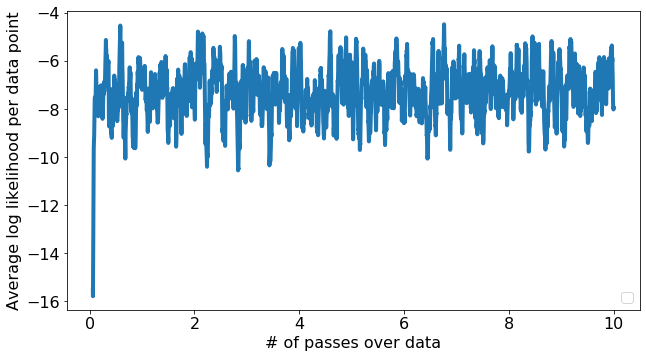

In [219]:
make_plot(likelihood_all, len(train_data), batch_size, smoothing_window=30, label='')

### Quiz Question: Which of the following is the worst step size? Pick the step size that results in the lowest log likelihood in the end.



## 1e2

## Quiz Question: Which of the following is the best step size? Pick the step size that results in the highest log likelihood in the end.

In [220]:
1e0

1.0

In [221]:
len(train_data)

47780